In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def ECDF(series):
    ser=series.value_counts().sort_index().cumsum()/len(series)
    ser.index.name='Value'
    ser.name='Probability'
    return ser

In [423]:
np.random.seed(223)
df = pd.DataFrame()

x2 = np.random.normal(0,np.pi/6,size=1000)
x2_org=x2.copy()
x2[np.abs(x2)<0.1]=0
df['Angle']=x2
alpha=(x2>np.pi/6)&(x2<np.pi/3).astype(int)
df['Poluted']=alpha
alpha=alpha*3+1
x1 = np.random.beta(alpha,10,size=1000)
x1_org=x1.copy()
x1[x1<0.01]=0
x1[x1>0.3]=0.3
df['Concentration']=x1


df_org=pd.DataFrame({'Angle':x2_org,'Concentration':x1_org,'Poluted':df['Poluted']})
df.drop('Poluted',axis=1)
df.to_csv('polution_observed_data.csv')
df_org.to_csv('polution_true_data.csv')

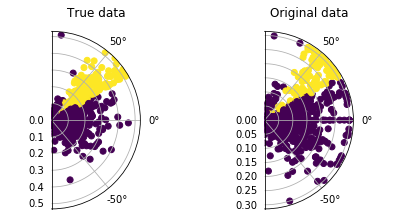

In [421]:
fig,axes = plt.subplots(1,2,figsize=(7, 8),subplot_kw=dict(polar=True))
ax=axes[0]
ax.scatter(x2_org, x1_org, c=df['Polluted'])

ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_title('True data')
ax=axes[1]
ax.scatter(x2, x1,c=df['Polluted'])
ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_title('Observed data')


plt.show()

In [349]:
series=df.Concentration

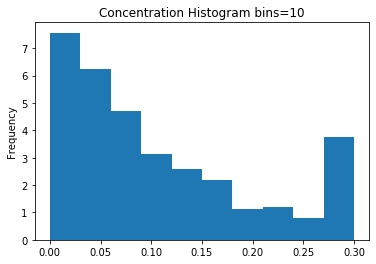

In [387]:
n=10
series.plot(kind='hist',bins=n,density=True,title=series.name+' Histogram bins={}'.format(n))
plt.show()

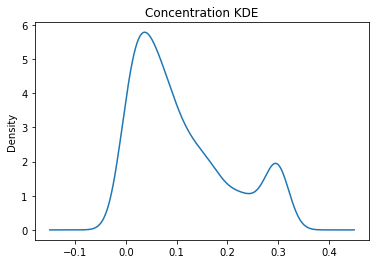

In [388]:
series.plot(kind='density',title=series.name+' KDE')
plt.show()

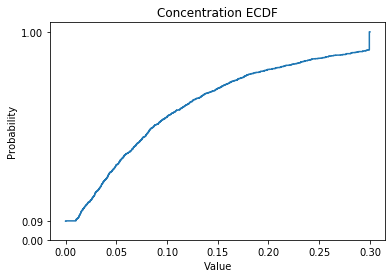

In [389]:
ax=ECDF(series).plot(title=series.name+' ECDF',drawstyle="steps")
ax.set_ylabel(ylabel='Probability')
ax.set_yticks([0, ECDF(series).min(),1])
plt.show()

In [375]:
series

0      0.109304
1      0.061208
2      0.124397
3      0.136913
4      0.032704
         ...   
995    0.017846
996    0.150839
997    0.091562
998    0.028896
999    0.029038
Name: Concentration, Length: 1000, dtype: float64

In [395]:
np.random.seed(223)

series = df.Angle

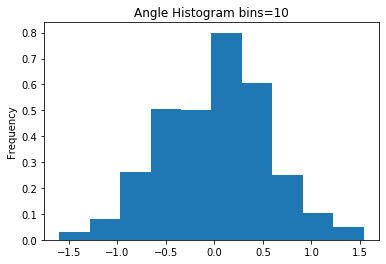

In [396]:
n=10
series.plot(kind='hist',bins=n,density=True,title=series.name+' Histogram bins={}'.format(n))

plt.show()

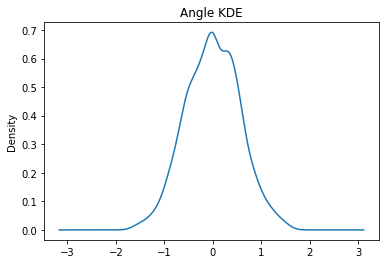

In [397]:
series.plot(kind='density',title=series.name+' KDE')
plt.show()

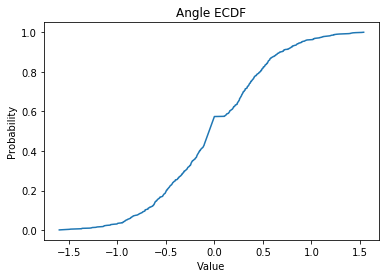

In [405]:
ax=ECDF(series).plot(title=series.name+' ECDF')
ax.set_ylabel(ylabel='Probability')
plt.show()

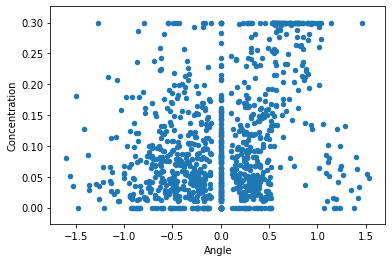

In [400]:
df.plot(x='Angle',y='Concentration',kind='scatter')